## 유튭 크롤링해보기

In [46]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import time

In [47]:
ser = Service('C:/Users/jhjh3/class/datasalon-master/02_data_class/chromedriver/chromedriver.exe')
driver = webdriver.Chrome(service=ser)

url = ('https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube')
driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

['category', 'singer', 'subscriber', 'view', 'video']

In [48]:
songs = soup.select('form table tbody tr')
# len(songs)
songs[0]

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLSWxQF3kaqYMX1MWVVzNkNZaM-3EU551f2orOqykA=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLSWxQF3kaqYMX1MWVVzNkNZaM-3EU551f2orOqykA=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span

In [49]:
# ['category', 'singer', 'subscriber', 'view', 'video']
song = songs[0]

category = song.select('p.category')[0].text.strip()
category

'[음악/댄스/가수]'

In [50]:
singer = song.select('h1 a')[0].text.strip()
singer

'BLACKPINK'

In [51]:
subscriber = song.select('td.subscriber_cnt')[0].text.strip()
subscriber

'7130만'

In [52]:
view = song.select('td.view_cnt')[0].text.strip()
view

'220억2860만'

In [53]:
video = song.select('td.video_cnt')[0].text.strip()
video

'395개'

In [54]:
songs = soup.select('form table tbody tr')
songs_list = []
rank = 1

for song in songs:
    category = song.select('p.category')[0].text.strip()
    singer = song.select('h1 a')[0].text.strip()
    subscriber = song.select('td.subscriber_cnt')[0].text.strip()
    view = song.select('td.view_cnt')[0].text.strip()
    video = song.select('td.video_cnt')[0].text.strip()
    mylist = [rank, category, singer, subscriber, view, video]
    songs_list.append(mylist)
    rank += 1
    
songs_list    

[[1, '[음악/댄스/가수]', 'BLACKPINK', '7130만', '220억2860만', '395개'],
 [2, '[음악/댄스/가수]', 'HYBE LABELS', '6360만', '210억1371만', '786개'],
 [3, '[음악/댄스/가수]', 'BANGTANTV', '6290만', '146억8130만', '1,665개'],
 [4, '[음악/댄스/가수]', 'SMTOWN', '2970만', '234억3321만', '3,841개'],
 [5, '[키즈/어린이]', 'Boram Tube Vlog [보람튜브 브이로그]', '2650만', '110억5288만', '223개'],
 [6, '[음악/댄스/가수]', '1MILLION Dance Studio', '2470만', '70억0543만', '3,517개'],
 [7, '[음악/댄스/가수]', '1theK (원더케이)', '2380만', '215억4518만', '15,835개'],
 [8, '[음악/댄스/가수]', 'JYP Entertainment', '2340만', '153억5057만', '1,435개'],
 [9, '[음악/댄스/가수]', 'Mnet K-POP', '1920만', '142억1584만', '27,027개'],
 [10, '[TV/방송]', 'KBS WORLD TV', '1740만', '130억6970만', '54,764개'],
 [11, '[음악/댄스/가수]', 'JFlaMusic', '1740만', '35억3017만', '282개'],
 [12, '[음식/요리/레시피]', 'Jane ASMR 제인', '1580만', '56억9872만', '1,338개'],
 [13, '[음악/댄스/가수]', 'officialpsy', '1540만', '89억1662만', '91개'],
 [14, '[음악/댄스/가수]', 'BIGBANG', '1400만', '68억8615만', '773개'],
 [15, '[음악/댄스/가수]', 'TWICE', '1290만', '28억7342만', '727개']

In [55]:
df_songs_list = pd.DataFrame(songs_list, 
                             columns = ['rank', 'category', 'singer', 'subscriber', 'view', 'video'])


df_songs_list.to_excel('./youtube_rank_prac.xlsx', index = False)

시각화하기

In [56]:
from matplotlib import rc, font_manager

In [57]:
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = path).get_name()
font_name
rc('font', family = font_name)

In [58]:
df = pd.read_excel('./youtube_rank_prac.xlsx')
df.head()

,rank,category,singer,subscriber,view,video
0,1,[음악/댄스/가수],BLACKPINK,7130만,220억2860만,395개
1,2,[음악/댄스/가수],HYBE LABELS,6360만,210억1371만,786개
2,3,[음악/댄스/가수],BANGTANTV,6290만,146억8130만,"1,665개"
3,4,[음악/댄스/가수],SMTOWN,2970만,234억3321만,"3,841개"
4,5,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개


In [59]:
df['subscriber'].value_counts()

1020만    2
381만     2
454만     2
654만     2
489만     2
        ..
781만     1
796만     1
839만     1
845만     1
375만     1
Name: subscriber, Length: 92, dtype: int64

In [60]:
df['category'].value_counts()

[음악/댄스/가수]     37
[키즈/어린이]       22
[음식/요리/레시피]    14
[TV/방송]        13
[뉴스/정치/사회]      3
[BJ/인물/연예인]     3
[애완/반려동물]       2
[해외]            1
[미분류]           1
[회사/오피셜]        1
[패션/미용]         1
[게임]            1
[취미/라이프]        1
Name: category, dtype: int64

In [61]:
df['replaced_subscriber'] = df['subscriber'].str.replace('만','0000')
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   rank                 100 non-null    int64 
 1   category             100 non-null    object
 2   singer               100 non-null    object
 3   subscriber           100 non-null    object
 4   view                 100 non-null    object
 5   video                100 non-null    object
 6   replaced_subscriber  100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [62]:
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   rank                 100 non-null    int64 
 1   category             100 non-null    object
 2   singer               100 non-null    object
 3   subscriber           100 non-null    object
 4   view                 100 non-null    object
 5   video                100 non-null    object
 6   replaced_subscriber  100 non-null    int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 5.2+ KB


In [63]:
df.head()

,rank,category,singer,subscriber,view,video,replaced_subscriber
0,1,[음악/댄스/가수],BLACKPINK,7130만,220억2860만,395개,71300000
1,2,[음악/댄스/가수],HYBE LABELS,6360만,210억1371만,786개,63600000
2,3,[음악/댄스/가수],BANGTANTV,6290만,146억8130만,"1,665개",62900000
3,4,[음악/댄스/가수],SMTOWN,2970만,234억3321만,"3,841개",29700000
4,5,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개,26500000


In [64]:
pivot_df = df.pivot_table(values = 'replaced_subscriber',
              index = 'category',
              aggfunc = ['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],13580000,3
[TV/방송],87570000,13
[게임],4260000,1
[뉴스/정치/사회],20430000,3
[미분류],6550000,1


In [65]:
pivot_df.columns = ['subscriber_sum','subscriber_count']
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,subscriber_count
0,[BJ/인물/연예인],13580000,3
1,[TV/방송],87570000,13
2,[게임],4260000,1
3,[뉴스/정치/사회],20430000,3
4,[미분류],6550000,1


In [66]:
pivot_df = pivot_df.sort_values(by = 'subscriber_sum',
                               ascending=False)

pivot_df = pivot_df.reset_index(drop=True, inplace =False)
pivot_df

,category,subscriber_sum,subscriber_count
0,[음악/댄스/가수],535900000,37
1,[키즈/어린이],163730000,22
2,[음식/요리/레시피],92900000,14
3,[TV/방송],87570000,13
4,[뉴스/정치/사회],20430000,3
5,[BJ/인물/연예인],13580000,3
6,[애완/반려동물],8080000,2
7,[해외],7810000,1
8,[미분류],6550000,1
9,[회사/오피셜],5950000,1


In [67]:
pivot_df.head(6)

,category,subscriber_sum,subscriber_count
0,[음악/댄스/가수],535900000,37
1,[키즈/어린이],163730000,22
2,[음식/요리/레시피],92900000,14
3,[TV/방송],87570000,13
4,[뉴스/정치/사회],20430000,3
5,[BJ/인물/연예인],13580000,3


In [69]:
import matplotlib.pyplot as plt

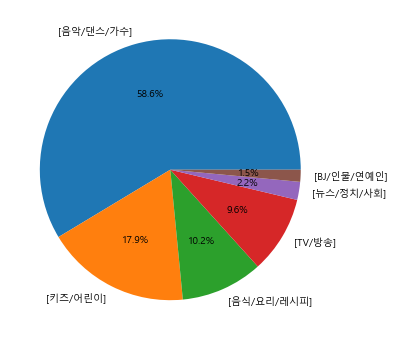

In [75]:
# plt.rcParams['font.size'] =  10
plt.figure(figsize = (6, 6))
plt.pie(pivot_df.head(6)['subscriber_sum'], 
        labels = pivot_df.head(6)['category'],
        autopct = '%.1f%%' )
                     
plt.show()                     


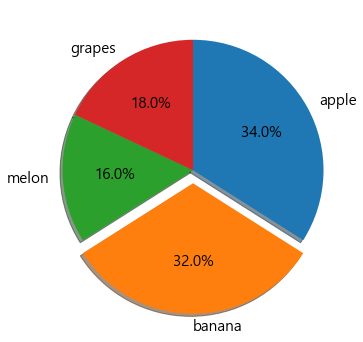

In [76]:
# pie
ratio = [34, 32, 16, 18]
labels = ['apple', 'banana', 'melon', 'grapes']
explodes = [0, 0.1, 0, 0]
plt.rcParams['font.size'] = 15

# pie.figure
plt.figure(figsize = (6,6))
plt.pie(ratio, labels = labels, 
       autopct = '%.1f%%', counterclock = False,
       startangle = 90, explode = explodes, shadow = True)
plt.show()